In [4]:
import os
os.chdir('/Users/jacksonwalters/tensorflow_datasets')
import pandas as pd

filepath_dict = {'tweet':   'labeled_tweets/labeled_tweets.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    If we have any hope of ending this chaos, we h...
label                                                       0
source                                                  tweet
Name: 0, dtype: object


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [6]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
#slice the df to get yelp sentences
df_tweet = df[df['source'] == 'tweet']
sentences = df_tweet['sentence'].values
#tweet sentiment labels. 0 = negative, 1 = positive
y = df_tweet['label'].values
#split the sentences into training data and test data
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
#vectorize the training and test data by word counting
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

CountVectorizer()

In [7]:
#vectorized training data
X_train = vectorizer.transform(sentences_train); X_train

<1500x5714 sparse matrix of type '<class 'numpy.int64'>'
	with 36890 stored elements in Compressed Sparse Row format>

In [8]:
#vectorized test data
X_test  = vectorizer.transform(sentences_test); X_test

<500x5714 sparse matrix of type '<class 'numpy.int64'>'
	with 11236 stored elements in Compressed Sparse Row format>

In [1]:
#USE A NEURAL NETWORK W/ 1 HIDDEN LAYER

In [2]:
from tensorflow import keras
from keras import Sequential
from keras import layers

In [10]:
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
#add a layer w/ 10 nodes, relu activation
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
#add a layer with 1 node, sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#summarize the model shape and parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                57150     
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 57,161
Trainable params: 57,161
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(X_test, y_test),
...                     batch_size=10)

/Users/jacksonwalters/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-01-12 17:58:05.659418: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-12 17:58:05.659492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-12 17:58:08.031406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_regist

In [12]:
#evaluate the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9860
Testing Accuracy:  0.9860


In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

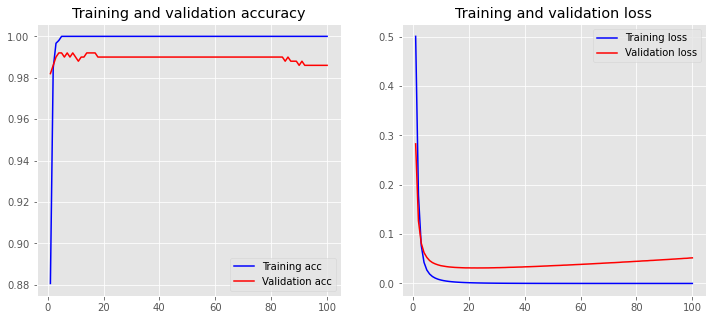

In [14]:
#plots over training epochs
#we want to stop training when our model starts performing worse on the validation
#data, so basically at the minimum of the red curve on the right.
plot_history(history)

In [15]:
model.predict(vectorizer.transform(["New York Times"]))

2022-01-12 18:04:15.304653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.9435953]], dtype=float32)